# Preparations

Before we start, some important imports

In [3]:
from graphviz import Digraph #for drawing the computational graph
import numpy as np

# Computational Graph

Computational graphs are a nice way to think about mathematical expressions. Consider our function 
$$u =
\begin{align}
\frac{ ln (x^{ 2 } + y^{ 2 } + A) }{ arctan (\sqrt{ x^{ 2 } + y^{ 2 } }) } 
\end{align}
$$ 

To create a computational graph, we make each of our operations, along with the input variables, into nodes. When one node’s value is the input to another node, an arrow goes from one to another.

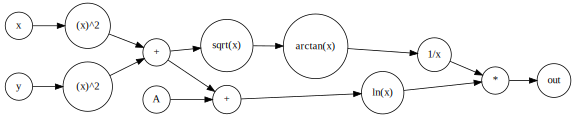

In [4]:
#creating empty graph
f = Digraph('computational_graph', filename='graph_clean.gv')
f.attr(rankdir='LR', size='8,5')

f.attr('node', shape='circle')
f.node('x')
f.node('y')
f.node('A')

f.attr('node', shape='circle')
f.edge('x', '(x)^2', label=' ')
f.edge('(x)^2', '+', label=' ')
f.edge('y', '(x)^2 ', label=' ')
f.edge('(x)^2 ', '+', label=' ')
f.edge('+','sqrt(x)', label=' ')
f.edge('sqrt(x)','arctan(x)', label=' ')
f.edge('arctan(x)','1/x',label=' ')
f.edge('1/x','*',label=' ')


f.edge('+','+ ', label=' ')
f.edge('A','+ ')
f.edge('+ ', 'ln(x)')
f.edge('ln(x)','*')

f.edge('*','out')

f

To make our life later much easier we can add some variables into our nodes

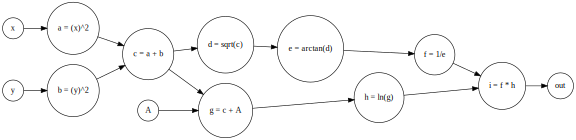

In [5]:
#creating graph with variables
f = Digraph('computational_graph', filename='graph_with_var.gv')
f.attr(rankdir='LR', size='8,5')

f.attr('node', shape='circle')
f.node('x')
f.node('y')
f.node('A')

f.attr('node', shape='circle')
f.edge('x', 'a = (x)^2', label=' ')
f.edge('a = (x)^2', 'c = a + b', label=' ')
f.edge('y', 'b = (y)^2', label=' ')
f.edge('b = (y)^2', 'c = a + b', label=' ')

f.edge('c = a + b','d = sqrt(c)', label=' ')
f.edge('d = sqrt(c)','e = arctan(d)', label=' ')
f.edge('e = arctan(d)','f = 1/e',label=' ')
f.edge('f = 1/e','i = f * h',label=' ')


f.edge('c = a + b','g = c + A', label=' ')
f.edge('A','g = c + A' , label=' ')
f.edge('g = c + A', 'h = ln(g)' , label=' ')
f.edge('h = ln(g)','i = f * h' , label=' ')

f.edge('i = f * h','out')

f

# Forward Path
After all preparations are done, we can evaluate the expression by setting the input variables to certain values and computing nodes up through the graph. For example, let’s set $x=4$, $y=3$ and $A = 1$

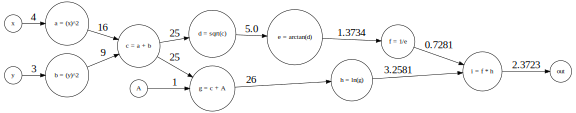

In [6]:
#Calculating all the values
x = 4
y = 3
A = 1

a = x * x
b = y * y
c = a + b
d = np.sqrt(c)
e = np.arctan(d)
f = 1/e

g = c + A
h = np.log(g)

i = f*h

#creating the graph
graph = Digraph('computational_graph', filename='graph_with_values.gv')
graph.attr(rankdir='LR', size='8,5')

graph.attr('node', shape='circle')
graph.node('x')
graph.node('y')
graph.node('A')

graph.attr('node', shape='circle')
graph.edge('x', 'a = (x)^2', label=str(round(x,4)), fontsize="22")
graph.edge('a = (x)^2', 'c = a + b', label=str(round(a)) , fontsize="22")
graph.edge('y', 'b = (y)^2', label=str(round(y,4)) , fontsize="22")
graph.edge('b = (y)^2', 'c = a + b', label=str(round(b,4)) , fontsize="22")

graph.edge('c = a + b','d = sqrt(c)', label=str(round(c,4)) , fontsize="22")
graph.edge('d = sqrt(c)','e = arctan(d)', label=str(round(d,4)) , fontsize="22")
graph.edge('e = arctan(d)','f = 1/e',label=str(round(e,4)), fontsize="22" )
graph.edge('f = 1/e','i = f * h', label=str(round(f,4)), fontsize="22")


graph.edge('c = a + b','g = c + A', label=str(c) , fontsize="22")
graph.edge('A','g = c + A' , label=str(A), fontsize="22")
graph.edge('g = c + A', 'h = ln(g)' , label=str(round(g,4)), fontsize="22")
graph.edge('h = ln(g)','i = f * h' , label=str(round(h,4)), fontsize="22")

graph.edge('i = f * h','out', label = str(round(i,4)), fontsize="22")

graph

# Backpropagation

If for example $x$ directly affects $i$, then we want to know how it affects $i$. If $x$ changes a little bit, how does $i$ change? All in all, with backpropagation, we want to know how all of our input variables, $x$, $y$, $A$, affects our output.

Mathematically we want to calculate the numerical values of our partial derivatives $ \frac{\partial u}{\partial x}$ , $\frac{\partial u}{\partial y}$ , $\frac{\partial u}{\partial A} $ which we know from calculus is following expression: 

$$ \frac{\partial u}{\partial x} = \left( \frac{\partial i}{\partial f} \times \frac{\partial f}{\partial e} \times \frac{\partial e}{\partial d} \times \frac{\partial d}{\partial c} + \frac{\partial i}{\partial h} \times \frac{\partial h}{\partial g} \times \frac{\partial g}{\partial c} \right) \times \frac{\partial c}{\partial a} \times \frac{\partial a}{\partial x} $$ 

$$ \frac{\partial u}{\partial y} = \left( \frac{\partial i}{\partial f} \times \frac{\partial f}{\partial e} \times \frac{\partial e}{\partial d} \times \frac{\partial d}{\partial c} + \frac{\partial i}{\partial h} \times \frac{\partial h}{\partial g} \times \frac{\partial g}{\partial c} \right) \times \frac{\partial c}{\partial a} \times \frac{\partial a}{\partial y} $$ 

$$\frac{\partial u}{\partial A} = \frac{\partial i}{\partial h} \times \frac{\partial h}{\partial g} \times \frac{\partial g}{\partial A}   $$

#### Rules
To get the same derivatives you need to use the $chain$ and $product$ rule. Note that these rules are:

Let $u=f(y) $ and $v=g(x)$ then the derivative of $f(x)*g(x)$ is 
$$ {\displaystyle {\dfrac {d}{dx}}(u\cdot v)={\dfrac {du}{dx}}\cdot v+u\cdot {\dfrac {dv}{dx}}}$$

Let $z=f(y) $ and $y=g(x)$ then the derivative of $f(g(x))$ is 
$$ {\frac  {dz}{dx}}={\frac  {dz}{dy}}\cdot {\frac  {dy}{dx}}. $$


### Calculating backward path
Lets start calculating all the partial derivatives while updating our graph each time. 

$$ \frac{\partial i}{\partial f} = h $$

$$ \frac{\partial i}{\partial h} = f $$

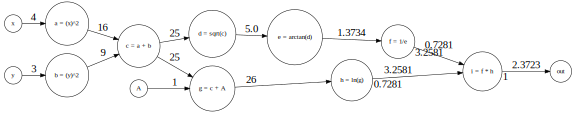

In [7]:
#creating the graph with backprop
df = h 
dh = f

graph = Digraph('computational_graph', filename='graph_with_values.gv')
graph.attr(rankdir='LR', size='8,5')

graph.attr('node', shape='circle')
graph.edge('x', 'a = (x)^2', label=str(round(x,4)), fontsize="22")
graph.edge('a = (x)^2', 'c = a + b', label=str(round(a)) , fontsize="22")
graph.edge('y', 'b = (y)^2', label=str(round(y,4)) , fontsize="22")
graph.edge('b = (y)^2', 'c = a + b', label=str(round(b,4)) , fontsize="22")

graph.edge('c = a + b','d = sqrt(c)', label=str(round(c,4)) , fontsize="22")
graph.edge('d = sqrt(c)','e = arctan(d)', label=str(round(d,4)) , fontsize="22")
graph.edge('e = arctan(d)','f = 1/e',label=str(round(e,4)), fontsize="22" )
graph.edge('f = 1/e','i = f * h', label=str(round(f,4)), fontsize="22",taillabel=str(round(df,4)))


graph.edge('c = a + b','g = c + A', label=str(c) , fontsize="22")
graph.edge('A','g = c + A' , label=str(A), fontsize="22")
graph.edge('g = c + A', 'h = ln(g)' , label=str(round(g,4)), fontsize="22")
graph.edge('h = ln(g)','i = f * h' , label=str(round(h,4)), fontsize="22", taillabel=str(round(dh,4)))

graph.edge('i = f * h','out', label = str(round(i,4)), fontsize="22", taillabel="1")

graph


$$ \frac{\partial f}{\partial e} = \frac{-1}{e^2} $$

$$ \frac{\partial h}{\partial g} = \frac{1}{g} $$


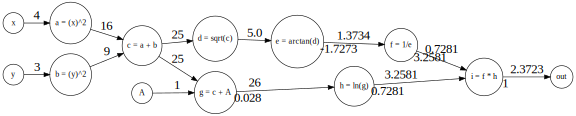

In [6]:
#creating the graph
de = (-1/e**2 )* df
dg = 1/g * dh

graph = Digraph('computational_graph', filename='graph_with_values.gv')
graph.attr(rankdir='LR', size='8,5')

graph.attr('node', shape='circle')
graph.edge('x', 'a = (x)^2', label=str(round(x,4)), fontsize="22")
graph.edge('a = (x)^2', 'c = a + b', label=str(round(a)) , fontsize="22")
graph.edge('y', 'b = (y)^2', label=str(round(y,4)) , fontsize="22")
graph.edge('b = (y)^2', 'c = a + b', label=str(round(b,4)) , fontsize="22")

graph.edge('c = a + b','d = sqrt(c)', label=str(round(c,4)) , fontsize="22")
graph.edge('d = sqrt(c)','e = arctan(d)', label=str(round(d,4)) , fontsize="22")
graph.edge('e = arctan(d)','f = 1/e',label=str(round(e,4)), fontsize="22", taillabel = str(round(de,4)))
graph.edge('f = 1/e','i = f * h', label=str(round(f,4)), fontsize="22",taillabel=str(round(df,4)))


graph.edge('c = a + b','g = c + A', label=str(c) , fontsize="22")
graph.edge('A','g = c + A' , label=str(A), fontsize="22")
graph.edge('g = c + A', 'h = ln(g)' , label=str(round(g,4)), fontsize="22", taillabel=str(round(dg,4)))
graph.edge('h = ln(g)','i = f * h' , label=str(round(h,4)), fontsize="22", taillabel=str(round(dh,4)))

graph.edge('i = f * h','out', label = str(round(i,4)), fontsize="22", taillabel="1")

graph


$$ \frac{\partial e}{\partial d} = \frac{1}{1 + d^2} $$

$$ \frac{\partial g}{\partial A} = 1 $$

$$ \frac{\partial g}{\partial c} = 1 $$


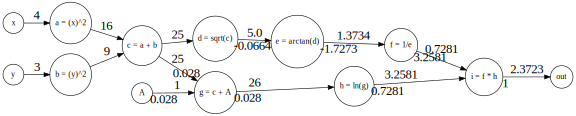

In [7]:
#creating the graph
dd = de * 1/(1+d**2)
dA = dg * 1
dc = dg * 1

graph = Digraph('computational_graph', filename='graph_with_values.gv')
graph.attr(rankdir='LR', size='8,5')

graph.attr('node', shape='circle')
graph.edge('x', 'a = (x)^2', label=str(round(x,4)), fontsize="22")
graph.edge('a = (x)^2', 'c = a + b', label=str(round(a)) , fontsize="22")
graph.edge('y', 'b = (y)^2', label=str(round(y,4)) , fontsize="22")
graph.edge('b = (y)^2', 'c = a + b', label=str(round(b,4)) , fontsize="22")

graph.edge('c = a + b','d = sqrt(c)', label=str(round(c,4)) , fontsize="22")
graph.edge('d = sqrt(c)','e = arctan(d)', label=str(round(d,4)) , fontsize="22",taillabel=str(round(dd,4)))
graph.edge('e = arctan(d)','f = 1/e',label=str(round(e,4)), fontsize="22", taillabel = str(round(de,4)))
graph.edge('f = 1/e','i = f * h', label=str(round(f,4)), fontsize="22",taillabel=str(round(df,4)))


graph.edge('c = a + b','g = c + A', label=str(c) , fontsize="22",headlabel=str(round(dc,4)))
graph.edge('A','g = c + A' , label=str(A), fontsize="22", taillabel=str(round(dA,4)))
graph.edge('g = c + A', 'h = ln(g)' , label=str(round(g,4)), fontsize="22", taillabel=str(round(dg,4)))
graph.edge('h = ln(g)','i = f * h' , label=str(round(h,4)), fontsize="22", taillabel=str(round(dh,4)))

graph.edge('i = f * h','out', label = str(round(i,4)), fontsize="22", taillabel="1")

graph


$$ \frac{\partial d}{\partial c} = \frac{1}{2 \times \sqrt{c}} $$


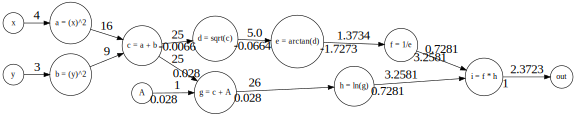

In [8]:
#creating the graph
dc2 = dd/(2*np.sqrt(c))

graph = Digraph('computational_graph', filename='graph_with_values.gv')
graph.attr(rankdir='LR', size='8,5')

graph.attr('node', shape='circle')
graph.edge('x', 'a = (x)^2', label=str(round(x,4)), fontsize="22")
graph.edge('a = (x)^2', 'c = a + b', label=str(round(a)) , fontsize="22")
graph.edge('y', 'b = (y)^2', label=str(round(y,4)) , fontsize="22")
graph.edge('b = (y)^2', 'c = a + b', label=str(round(b,4)) , fontsize="22")

graph.edge('c = a + b','d = sqrt(c)', label=str(round(c,4)) , fontsize="22", taillabel=str(round(dc2,4)))
graph.edge('d = sqrt(c)','e = arctan(d)', label=str(round(d,4)) , fontsize="22",taillabel=str(round(dd,4)))
graph.edge('e = arctan(d)','f = 1/e',label=str(round(e,4)), fontsize="22", taillabel = str(round(de,4)))
graph.edge('f = 1/e','i = f * h', label=str(round(f,4)), fontsize="22",taillabel=str(round(df,4)))


graph.edge('c = a + b','g = c + A', label=str(c) , fontsize="22",headlabel=str(round(dc,4)))
graph.edge('A','g = c + A' , label=str(A), fontsize="22", taillabel=str(round(dA,4)))
graph.edge('g = c + A', 'h = ln(g)' , label=str(round(g,4)), fontsize="22", taillabel=str(round(dg,4)))
graph.edge('h = ln(g)','i = f * h' , label=str(round(h,4)), fontsize="22", taillabel=str(round(dh,4)))

graph.edge('i = f * h','out', label = str(round(i,4)), fontsize="22", taillabel="1")

graph


$$ \frac{\partial c}{\partial a} = 1 $$

$$ \frac{\partial c}{\partial b} = 1 $$


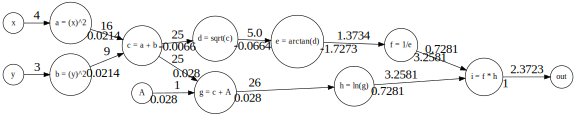

In [9]:
#creating the graph
da = (dc + dc2 )* 1
db = (dc + dc2 )* 1

graph = Digraph('computational_graph', filename='graph_with_values.gv')
graph.attr(rankdir='LR', size='8,5')

graph.attr('node', shape='circle')
graph.edge('x', 'a = (x)^2', label=str(round(x,4)), fontsize="22")
graph.edge('a = (x)^2', 'c = a + b', label=str(round(a)) , fontsize="22", taillabel = str(round(da,4)))
graph.edge('y', 'b = (y)^2', label=str(round(y,4)) , fontsize="22")
graph.edge('b = (y)^2', 'c = a + b', label=str(round(b,4)) , fontsize="22", taillabel=str(round(db,4)))

graph.edge('c = a + b','d = sqrt(c)', label=str(round(c,4)) , fontsize="22", taillabel=str(round(dc2,4)))
graph.edge('d = sqrt(c)','e = arctan(d)', label=str(round(d,4)) , fontsize="22",taillabel=str(round(dd,4)))
graph.edge('e = arctan(d)','f = 1/e',label=str(round(e,4)), fontsize="22", taillabel = str(round(de,4)))
graph.edge('f = 1/e','i = f * h', label=str(round(f,4)), fontsize="22",taillabel=str(round(df,4)))


graph.edge('c = a + b','g = c + A', label=str(c) , fontsize="22",headlabel=str(round(dc,4)))
graph.edge('A','g = c + A' , label=str(A), fontsize="22", taillabel=str(round(dA,4)))
graph.edge('g = c + A', 'h = ln(g)' , label=str(round(g,4)), fontsize="22", taillabel=str(round(dg,4)))
graph.edge('h = ln(g)','i = f * h' , label=str(round(h,4)), fontsize="22", taillabel=str(round(dh,4)))

graph.edge('i = f * h','out', label = str(round(i,4)), fontsize="22", taillabel="1")

graph

$$ \frac{\partial a}{\partial x} = 2 \times x $$

$$ \frac{\partial b}{\partial y} = 2 \times y $$


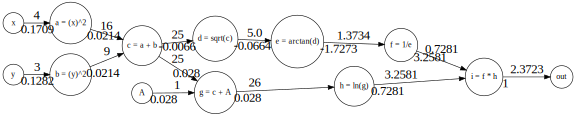

In [10]:
#creating the graph
dx = 2*x*da
dy = 2*y*db

graph = Digraph('computational_graph', filename='graph_with_values.gv')
graph.attr(rankdir='LR', size='8,5')

graph.attr('node', shape='circle')
graph.edge('x', 'a = (x)^2', label=str(round(x,4)), fontsize="22", taillabel=str(round(dx,4)))
graph.edge('a = (x)^2', 'c = a + b', label=str(round(a)) , fontsize="22", taillabel = str(round(da,4)))
graph.edge('y', 'b = (y)^2', label=str(round(y,4)) , fontsize="22", taillabel=str(round(dy,4)))
graph.edge('b = (y)^2', 'c = a + b', label=str(round(b,4)) , fontsize="22", taillabel=str(round(db,4)))

graph.edge('c = a + b','d = sqrt(c)', label=str(round(c,4)) , fontsize="22", taillabel=str(round(dc2,4)))
graph.edge('d = sqrt(c)','e = arctan(d)', label=str(round(d,4)) , fontsize="22",taillabel=str(round(dd,4)))
graph.edge('e = arctan(d)','f = 1/e',label=str(round(e,4)), fontsize="22", taillabel = str(round(de,4)))
graph.edge('f = 1/e','i = f * h', label=str(round(f,4)), fontsize="22",taillabel=str(round(df,4)))


graph.edge('c = a + b','g = c + A', label=str(c) , fontsize="22",headlabel=str(round(dc,4)))
graph.edge('A','g = c + A' , label=str(A), fontsize="22", taillabel=str(round(dA,4)))
graph.edge('g = c + A', 'h = ln(g)' , label=str(round(g,4)), fontsize="22", taillabel=str(round(dg,4)))
graph.edge('h = ln(g)','i = f * h' , label=str(round(h,4)), fontsize="22", taillabel=str(round(dh,4)))

graph.edge('i = f * h','out', label = str(round(i,4)), fontsize="22", taillabel="1")

graph

Now we can actually see that
$$ \frac{\partial u}{\partial x} = \left( \frac{\partial i}{\partial f} \times \frac{\partial f}{\partial e} \times \frac{\partial e}{\partial d} \times \frac{\partial d}{\partial c} + \frac{\partial i}{\partial h} \times \frac{\partial h}{\partial g} \times \frac{\partial g}{\partial c} \right) \times \frac{\partial c}{\partial a} \times \frac{\partial a}{\partial x} = 0.1709...$$ 

$$ \frac{\partial u}{\partial y} = \left( \frac{\partial i}{\partial f} \times \frac{\partial f}{\partial e} \times \frac{\partial e}{\partial d} \times \frac{\partial d}{\partial c} + \frac{\partial i}{\partial h} \times \frac{\partial h}{\partial g} \times \frac{\partial g}{\partial c} \right) \times \frac{\partial c}{\partial a} \times \frac{\partial a}{\partial y} = 0.1282....$$ 

$$\frac{\partial u}{\partial A} = \frac{\partial i}{\partial h} \times \frac{\partial h}{\partial g} \times \frac{\partial g}{\partial A  }= 0.028...   $$

# Validating
We know from calculus that our derivitaves have to look like

$$  \frac{\partial f}{\partial x} (x,y,A) = \frac{2\times x}{(x^{2}+y^{2} + A)\times arctan(\sqrt{x^2+y^2})}- \frac{ln(x^2+y^2+A)\times x}{(x^{2}+y^{2} + A)\times arctan(\sqrt{x^2+y^2})^2 \times \sqrt{x^2+y^2}} $$

$$  \frac{\partial f}{\partial y} (x,y,A) = \frac{2\times y}{(x^{2}+y^{2} + A)\times arctan(\sqrt{x^2+y^2})} - \frac{ln(x^2+y^2+A)\times y}{(x^{2}+y^{2} + A)\times arctan(\sqrt{x^2+y^2})^2 \times \sqrt{x^2+y^2}} $$

$$  \frac{\partial f}{\partial A} (x,y,A) = \frac{1}{(x^{2}+y^{2}+A) \times arctan(\sqrt{x^2+y^2})} $$

## Replacing operations
We can replace some of our operations with already defined operations because they are equal $ \forall x,y,A \in \mathbb{R^3} $

$$  \frac{\partial f}{\partial x} (x,y,A) = \frac{2\times x}{g\times e}- \frac{h\times x}{g\times e^2 \times d} $$

$$  \frac{\partial f}{\partial y} (x,y,A) = \frac{2\times y}{g\times e}- \frac{h\times y}{g\times e^2 \times d} $$

$$  \frac{\partial f}{\partial A} (x,y,A) = \frac{1}{g \times e} $$

In [11]:
x = 4
y = 3
A = 1

ux = (2*x)/((x**2 + y**2 + A)*np.arctan(np.sqrt(x**2+y**2))) - (np.log(x**2+y**2+A)*x)/((x**2 + y**2 + A)*np.arctan(np.sqrt(x**2+y**2))**2*np.sqrt(x**2+y**2))
uy = (2*y)/((x**2 + y**2 + A)*np.arctan(np.sqrt(x**2+y**2))) - (np.log(x**2+y**2+A)*y)/((x**2 + y**2 + A)*np.arctan(np.sqrt(x**2+y**2))**2*np.sqrt(x**2+y**2))
uA = 1/((x**2 + y**2 + A)*np.arctan(np.sqrt(x*x+y*y)))

ux_replaced = (2*x)/(g*e) - (h*x)/(g*e**2*d)
uy_replaced = (2*y)/(g*e) - (h*y)/(g*e**2*d)
uA_replaced = 1/(g*e)

print("Is everything correct?",np.abs(ux-ux_replaced)<0.0000001)
print("Is everything correct?",np.abs(uy-uy_replaced)<0.0000001)
print("Is everything correct?",np.abs(uA-uA_replaced)<0.0000001)


Is everything correct? True
Is everything correct? True
Is everything correct? True


## Testing if our calculations were right
So lets validate our calculations now. To do that, we have to compare our solutions

In [12]:
print("Is everything correct?",np.abs(ux_replaced-dx)<0.0000001)
print("Is everything correct?",np.abs(uy_replaced-dy)<0.0000001)
print("Is everything correct?",np.abs(uA_replaced-dA)<0.0000001)

Is everything correct? True
Is everything correct? True
Is everything correct? True
